# MNIST Dataset (Handwritten digist) with tf.keras

On this notebook you'll learn how to train an image classifier on the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) - the "hello world" of computer vision: loading the data, building and training a model, calculating the accuracy, and making predictions. Let's proceed with checking the TensorFlow version (should be 1.8):

In [1]:
!date
!pip install --ignore-installed --upgrade tensorflow==1.8.0

import tensorflow as tf
import numpy as np

print(tf.__version__)
# or
print(tf.VERSION)

Thu May 17 18:19:38 UTC 2018
  Using cached https://files.pythonhosted.org/packages/6d/dc/464f59597a5a8282585238e6e3a7bb3770c3c1f1dc8ee72bd5be257178ec/tensorflow-1.8.0-cp35-cp35m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/59/a6/0ae6092b7542cfedba6b2a1c9b8dceaf278238c39484f3ba03b03f07803c/tensorboard-1.8.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/7b/61/11b05cc37ccdaabad89f04dbdc2a02905cf6de6f9b05816dba843beed328/numpy-1.14.3-cp35-cp35m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/5b/c3/9b947e301e19bea75dc8c1fd3710eed5d2b31aa13ae13d5e38e891f784cc/protobuf-3.5.2.post1-cp35-cp35m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/81/30/e935244ca6165187ae8be876b6316ae201b71485538ffac1d718843025a9/wheel-0.31.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/b2/91/cc9805f1ff7b49f620136b3a7ca26f6a1be2ed424606804b0fbcf499f712/astor-0.6.2-py2.py3-

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


1.8.0
1.8.0


### Step 1. Downloading the dataset

The MNIST dataset contains 60'000 grayscale images in training dataset and 10'000 grayscale images in testing dataset of handwritten digits. They will be downloaded automatically using ```tf.keras.datasets.mnist``` functionality.

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


### Step 2. Visualizing the data
Let's look at the images.

Label: 3


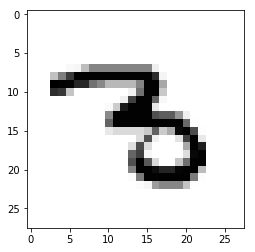

In [3]:
import random
import matplotlib.pyplot as plt
%matplotlib inline

i = random.randint(0, 100)

print("Label: %s" % train_labels[i])
plt.imshow(train_images[i], cmap="Greys");

### Step 3. Understanding the data layout

We are given dataset as a list of 2D grayscale 28 by 28 images. So, it is a 3-D array of integer values that is of shape (*N*, 28, 28), where *N* is the number of images in the training or test set. The labels are 1-D array of the integer values of each image.

In [4]:
print(train_images.shape)
print(train_labels.shape)

#np.set_printoptions(precision=2)
np.set_printoptions(linewidth=1000)
print(train_images[i])

(60000, 28, 28)
(60000,)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  11  19  95 143 143 143 143 143 143 143 143  33   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  90 149 208 253 253 253 253 253 253 253 2

### Step 4. Reformating the images

For our model (and for our own convenience) let's modify the layout of our data from 28*28 2D representation to 1D 784 (= 28 x 28) array because we plan to use fully-connected neural network as our model and convert ```integer``` grayscale intensity to ```float``` format by dividing element-wise everything my 255 (the highest intensity) - rescaling these intensities from 0 to 1.

In [5]:
TRAINING_SIZE = len(train_images)
TEST_SIZE = len(test_images)

# Reshape from (N, 28, 28) to (N, 784)
train_images = np.reshape(train_images, (TRAINING_SIZE, 784))
test_images = np.reshape(test_images, (TEST_SIZE, 784))

# Convert the array to float32 as opposed to uint8
train_images = train_images.astype(np.float32)
test_images = test_images.astype(np.float32)

# Convert the pixel values from integers between 0 and 255 to floats between 0 and 1
train_images /= 255
test_images /=  255

Let's check the layout again:

In [6]:
print(train_images.shape)
print(train_labels.shape)

np.set_printoptions(precision=1)
np.set_printoptions(linewidth=4*29)
print(train_images[i])

(60000, 784)
(60000,)
[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.1 0.4 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.1 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.4 0.6 0.8 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.9 0.1 0.  0.  0

### Step 5. Reformating the labels

Next, we want to convert the labels from an integer format (e.g., "2"), to a [one hot encoding](https://en.wikipedia.org/wiki/One-hot) (e.g., "0, 0, 1, 0, 0, 0, 0, 0, 0, 0"). To do so, we'll use the ```tf.keras.utils.to_categorical``` [function](https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical) function.

In [7]:
NUM_DIGITS = 10

print("Before", train_labels[i]) # The format of the labels before conversion

train_labels  = tf.keras.utils.to_categorical(train_labels, NUM_DIGITS)

print("After", train_labels[i]) # The format of the labels after conversion

test_labels = tf.keras.utils.to_categorical(test_labels, NUM_DIGITS)

Before 3
After [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


### Step 6. Building the model

Now, we'll create our neural network using the [Keras Sequential API](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential). 
* We will use fully-connected one-layer neural network 
* The hidden layer will have 512 units using the [ReLU](https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu) activation function. 
* The output layer will have 10 units and use [softmax](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax) function. 
* Notice, we specify the input shape on the first layer. If you add subsequent layers, this is not required. 
* We will use the [categorical crossentropy](https://www.tensorflow.org/api_docs/python/tf/keras/losses/categorical_crossentropy) loss function, and the [RMSProp](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/RMSprop) optimizer.

In [8]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(784,)))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

# We will now compile and print out a summary of our model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


Amazing article about Optimizers: http://ruder.io/optimizing-gradient-descent/ by Sebastian Ruder

| Optimizations on loss surface contours | Optimization on saddle point |
| ---- |------|
|   <img src=images/contours_evaluation_optimizers.gif style="width: 400px;"/>  | <img src=images/saddle_point_evaluation_optimizers.gif style="width: 400px;"/>|

### Step 7. Visualizing model with TensorBoard

In [9]:
writer = tf.summary.FileWriter('./tb/1')
writer.add_graph(tf.get_default_graph())

In [10]:
!hostname
# Don't run on Azure Notebooks
#!tensorboard --logdir ./tb/1

nbserver


After running TensorBoard you should see the following graph:
![initial graph](images/graph_init.png)

### Step 8. Training the model

Next, we will train the model by using the [fit method](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential#fit) for 5 [epochs](https://www.quora.com/What-is-epochs-in-machine-learning). We will keep track of the training loss and accuracy.

In [11]:
import time

start = time.time()
model.fit(train_images, train_labels, epochs=5)
print("Training time: %.2f s" % (time.time() - start) )

Epoch 1/5
60000/60000 [==============================] - 98s 2ms/step - loss: 0.2036 - acc: 0.9399
Epoch 2/5
60000/60000 [==============================] - 90s 2ms/step - loss: 0.0909 - acc: 0.9736
Epoch 3/5
60000/60000 [==============================] - 89s 1ms/step - loss: 0.0672 - acc: 0.9810
Epoch 4/5
60000/60000 [==============================] - 90s 1ms/step - loss: 0.0503 - acc: 0.9861: 0s - loss: 0.0502 - acc: 0
Epoch 5/5
60000/60000 [==============================] - 95s 2ms/step - loss: 0.0419 - acc: 0.9892
Training time: 463.28 s


### Step 9. Testing
Now that we have trained our model, we want to evaluate it. Sure, our model is >97% accurate on the training set, but what about on data it hasn't seen before? The test accuracy is a good metric for that.

In [12]:
loss, accuracy = model.evaluate(test_images, test_labels)
print('Test accuracy: %.2f' % (accuracy))

10000/10000 [==============================] - 4s 394us/step
Test accuracy: 0.98


## Congratulations

You have successfully used TensorFlow Keras to train a model on the MNIST dataset.
Let's update TensorBoard Graph visualization:

In [13]:
writer = tf.summary.FileWriter('./tb/1')
writer.add_graph(tf.get_default_graph())

After running TensorBoard you should see the final graph:
![final graph](images/graph_final.png)